In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df15 = pd.read_csv("../Dataset/15-02-2018(Time).csv", low_memory = False)
df15 = df15.drop([0,1])
df15['Timestamp']= pd.to_datetime(df15['Timestamp'])
df15 = df15.sort_values(by=['Timestamp'])
df15 = df15.drop(columns = ['Timestamp'])

In [3]:
df15

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
305204,3389.0,6.0,2530981.0,8.0,7.0,1128.0,1581.0,661.0,0.0,141.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
625011,445.0,6.0,562585.0,6.0,5.0,455.0,338.0,140.0,0.0,75.8333333333,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
747969,80.0,6.0,5291706.0,4.0,4.0,97.0,232.0,97.0,0.0,24.25,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
728998,80.0,6.0,93.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
728997,80.0,6.0,974.0,3.0,4.0,161.0,488.0,161.0,0.0,53.6666666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364710,443.0,6.0,218.0,3.0,0.0,77.0,0.0,46.0,0.0,25.6666666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
364711,51319.0,6.0,35.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
778527,80.0,6.0,53636845.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
929269,3389.0,6.0,2426253.0,8.0,7.0,1128.0,1581.0,661.0,0.0,141.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
df16Aux = pd.read_csv("../Dataset/16-02-2018(Time).csv", low_memory = False)
df16Aux = df16Aux.drop([0,1])
df16Aux['Timestamp']= pd.to_datetime(df16Aux['Timestamp'])
df16Aux = df16Aux.sort_values(by=['Timestamp'])
df16Aux = df16Aux.drop(columns = ['Timestamp'])

In [5]:
listOrd = df15.columns.tolist()
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [6]:
df16Aux = None

In [7]:
df16

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
91661,0,0,112640723,3,0,0,0,0,0,0,...,0,0,0,0,0,56300000,101.1162697,56300000,56300000,Benign
91660,22,6,2146470,14,12,1335,2273,744,0,95.35714286,...,32,0,0,0,0,0,0,0,0,Benign
91663,0,0,112640737,3,0,0,0,0,0,0,...,0,0,0,0,0,56300000,17.67766953,56300000,56300000,Benign
91691,67,17,721,1,1,300,329,300,300,300,...,8,0,0,0,0,0,0,0,0,Benign
91665,0,0,112640647,3,0,0,0,0,0,0,...,0,0,0,0,0,56300000,58.68986284,56300000,56300000,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91655,0,0,112640636,3,0,0,0,0,0,0,...,0,0,0,0,0,56300000,82.02438662,56300000,56300000,Benign
91656,0,0,112640695,3,0,0,0,0,0,0,...,0,0,0,0,0,56300000,26.1629509,56300000,56300000,Benign
91659,0,0,112640664,3,0,0,0,0,0,0,...,0,0,0,0,0,56300000,28.28427125,56300000,56300000,Benign
91657,22,6,10162102,9,7,1063,1297,744,0,118.1111111,...,32,989739,0,989739,989739,9172344,0,9172344,9172344,Benign


In [8]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)
output_label15 = np.array(df15["Label"])
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15= out

In [9]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)
output_label16 = np.array(df16["Label"])
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [10]:
dfAE = pd.concat([df15, df16])
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)
output_labelAE = np.array(dfAE["Label"])
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [11]:
dfAE = None
df15 = None
df16 = None
out = None

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

## AutoEncoder

In [13]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)

In [14]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [15]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [16]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [17]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [18]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
47006/47006 [==============================] - 52s 1ms/step - loss: 0.0051 - accuracy: 0.9124 - val_loss: 0.0041 - val_accuracy: 0.9114
Epoch 2/10
47006/47006 [==============================] - 53s 1ms/step - loss: 0.0041 - accuracy: 0.9274 - val_loss: 0.0041 - val_accuracy: 0.9333 6s - loss: 0.0041 - accuracy:  - ETA: 6s - loss: 0.0041 - accuracy - ETA: 6s - loss: 0.0041 -  - ETA: 6s - loss: 0.0041 - ac - ETA: 5s - - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.0041 - accuracy:  - ETA: 0s - loss: 0.0041 - accuracy
Epoch 3/10
47006/47006 [==============================] - 48s 1ms/step - loss: 0.0041 - accuracy: 0.9281 - val_loss: 0.0041 - val_accuracy: 0.9505
Epoch 4/10
47006/47006 [==============================] - 52s 1ms/step - loss: 0.0041 - accuracy: 0.9278 - val_loss: 0.0041 - val_accuracy: 0.9329
Epoch 5/10
47006/47006 [==============================] - 54s 1ms/step - loss: 0.0041 - accuracy: 0.9285 - val_loss: 0.0041 - val_accuracy: 0.9502
Epoch 6/10
47006/47006 [======

In [19]:
predict = auto_encoder.predict(inp_test)
losses = keras.losses.mean_squared_error(out_test, predict).numpy()
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.004122717366449635


In [20]:
inp_train = None
inp_test = None
out_train = None
out_test = None
input_labelAE = None

In [21]:
input_label15 = encoder.predict(input_label15)
input_label16 = encoder.predict(input_label16)

In [22]:
tamanhoSequencia = 10

In [23]:
inp = []
out = []
num = 0
for i in range(len(input_label15) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label15[j])
    inp.append(aux)
    out.append(output_label15[i + tamanhoSequencia - 1])
input_label15 = inp
output_label15 = out

In [24]:
inp = []
out = []
num = 0
for i in range(len(input_label16) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label16[j])
    inp.append(aux)
    out.append(output_label16[i + tamanhoSequencia - 1])
input_label16 = inp
output_label16 = out

In [25]:
inp = None
out = None

## Classificador

In [26]:
model = keras.Sequential([
    keras.layers.LSTM(units = 16, input_shape = ((tamanhoSequencia,18)), return_sequences = True, use_bias = True),
    keras.layers.LSTM(units = 8, return_sequences = False, use_bias = True),
    keras.layers.Dense(units = 2, activation = "softmax")
])
model.compile(optimizer= keras.optimizers.Adam(lr= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [27]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, verbose = 1)

Epoch 1/10
29266/29266 [==============================] - 175s 6ms/step - loss: 0.0871 - accuracy: 0.9775 - val_loss: 0.0088 - val_accuracy: 0.9975
Epoch 2/10
29266/29266 [==============================] - 170s 6ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 3/10
29266/29266 [==============================] - 170s 6ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0035 - val_accuracy: 0.9997
Epoch 4/10
29266/29266 [==============================] - 170s 6ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 5/10
29266/29266 [==============================] - 171s 6ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 6/10
29266/29266 [==============================] - 170s 6ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 7/10
29266/29266 [==============================] - 169s 6ms/step - loss: 0.0067 - accuracy: 0.9975 - val_

In [28]:
input_label15 = None
output_label15 = None

In [37]:
resu = model.predict(np.array(input_label16))

In [38]:
res = [np.argmax(r) for r in resu]

In [39]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [40]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  3582 443181]
 [139906 461896]]


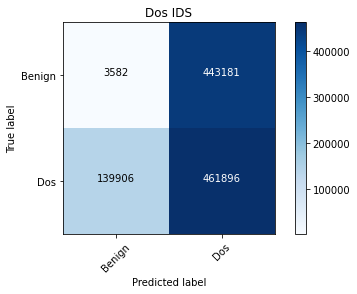

In [41]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [42]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

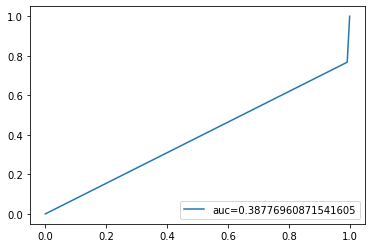

In [43]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()